In [34]:
# 머신러닝 구조(패턴)
# 데이터 수집 -> 정제/EDA -> 전처리 -> 모델 선정 -> 학습 -> 평가 -> 피드백
# .... -> (재학습 or 모델변경 or 전처리) -> 배포


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. 데이터 수집 및 전처리 (모델에 학습할 데이터 준비)
# 예시 데이터 생성
data = {
    'Pclass': [3, 1, 3, 1],
    'Sex': [0, 1, 0, 1],   # male=0, female=1
    'Age': [22, 38, 26, 35],
    'Fare': [7.25, 71.28, 7.92, 53.10],
    'Survived': [0, 1, 1, 1]
}

df = pd.DataFrame(data)

iris_data = df[['Pclass', 'Sex', 'Age', 'Fare']]
iris_label = df['Survived']
# 기본 데이터를 학습 데이터와 테스트 데이터로 8:2 준비
# 학습/테스트 분리 X_train(featrue), y_train(label) / 테스트 데이터 x_test, y_test
x_train, x_test, y_train, y_test = train_test_split(
    iris_data, iris_label
    , train_size=0.8
    , shuffle=False
    ,stratify=iris_label
    ,random_state = 11
)


# 2. 모델 준비
model = LinearRegression()

# 3. 학습 (준비해놓은 학습데이터 사용)
model.fit(x_train, y_train)

# 4. 예측 (준비해높은 테스트데이터 사용)
y_pred = model.predict(x_test)

# 5 vudrk
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(mse)
print(r2)

#시각화

#6. 결과



ValueError: Stratified train/test split is not implemented for shuffle=False

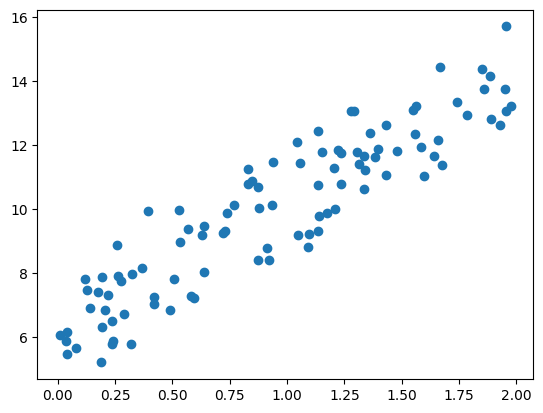

2.7793690765489028


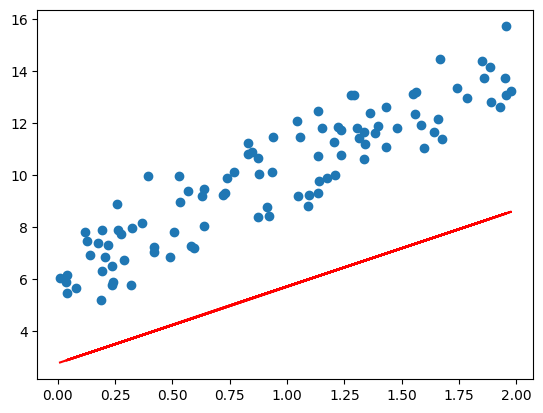

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1) # 잡음 random noise

# 데이터 시각화
plt.scatter(X, y)
plt.show()

# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

# 가중치(w1,w0) 업데이트 함수 정의
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    y_pred = np.dot(X, w1.T) + w0   # 예측값 계산
    diff = y - y_pred               # 오차 계산

    w0_factors = np.ones((N, 1))    # W0 업데이트 하는 상수 1 배열

    w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff)) # w1 업데이트
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff)) # w0 업데이트

    return w1_update, w0_update

# 경사 하강법 함수 정의
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update

    return w1, w0

# 경사 하강법 실행 및 결과 확인
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print(w0[0, 0])  # w0 결과 출력

# 예측값 계산
y_pred = w1[0, 0] * X + w0

# 예측 결과 시각화
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()

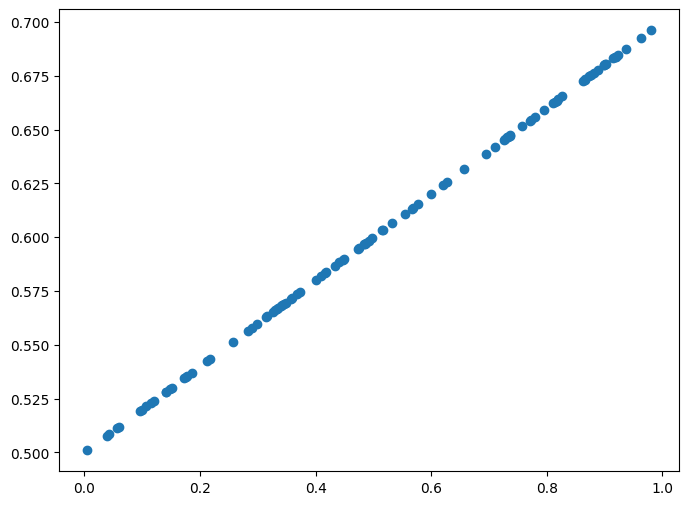

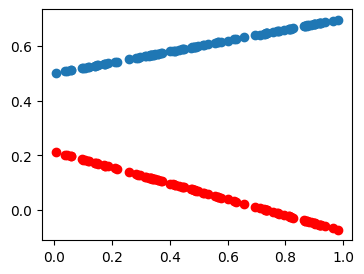

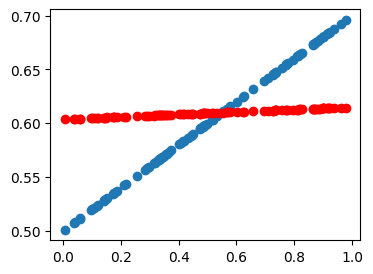

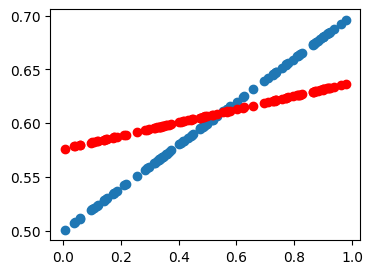

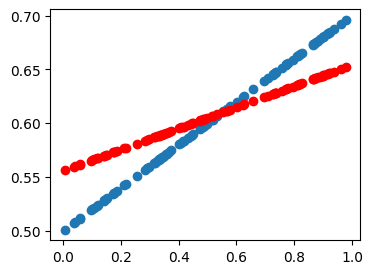

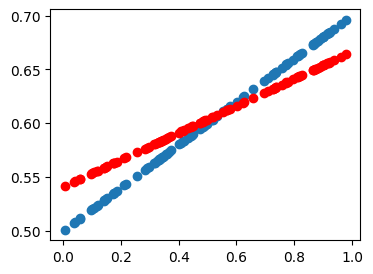

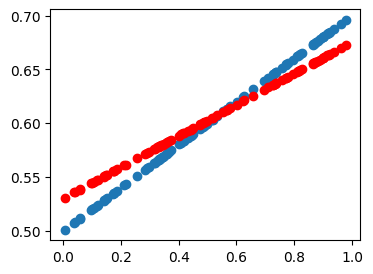

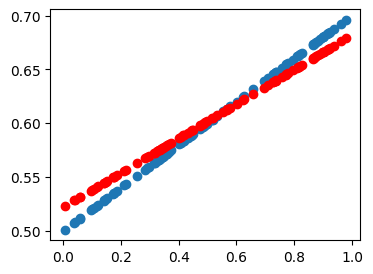

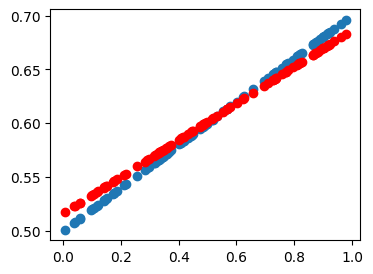

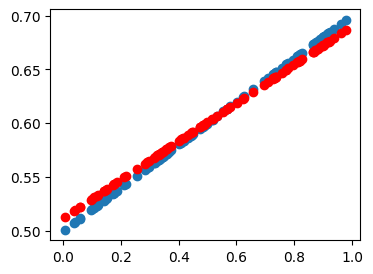

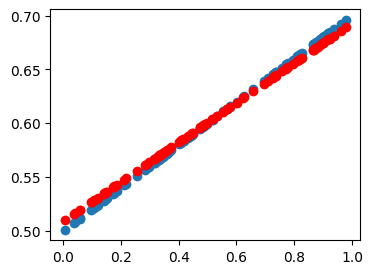

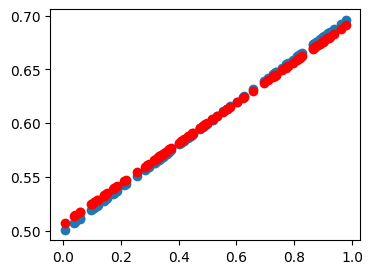

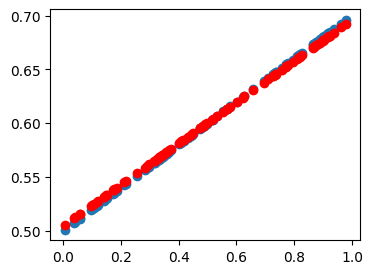

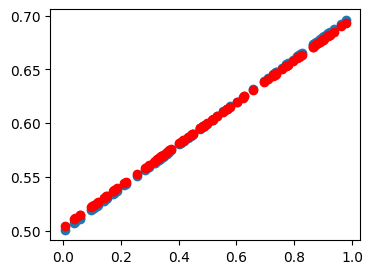

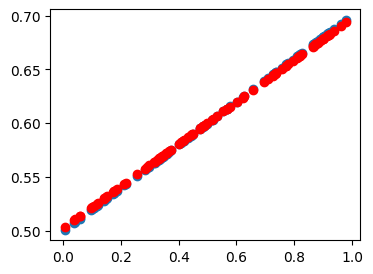

w : 0.19615918615281908
b : 0.5021088717005542


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
x = np.random.rand(100) # 0~1 데이터 백개 생성
y = 0.2 * x + 0.5       # 정답 Y (기울기 0.2, 절편 0.5인 직선)

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.show()

# 가중치와 편향 초기화
w = np.random.uniform(-1,1) # 가중치 w를 -1~1 사이 랜덤 값으로
b = np.random.uniform(-1,1) # 편향  b를 -1~1 사이 랜덤 값으로

# 예측 결과 시각화 함수

def plot_pred(pred,y):
    plt.figure(figsize=(4,3))
    plt.scatter(x,y)
    plt.scatter(x, pred,color='red')
    plt.show()
    
# 경사 하강법을 통한 학습
lr = 0.5

# 경사하강법 사용해서 가중치와 편향을 업데이트하며 학습 진행
for epoch in range(300):
    y_pred = w * x + b          # 현재 w, b로 예측값 계산
    
    error = np.abs(y_pred - y).mean() #예측값과 실제값의 평균 절대오차 (MAE)
    
    w_grad = lr * ((y_pred - y) * x).mean() # w에 대한 기울기 계산 후 학습률 곱하기
    b_grad = lr * (y_pred - y).mean() # w에 대한 기울기 계산 후 학습률 곱하기
    
    w -= w_grad # 가중치 w를 경사하강법으로 업데이트
    b -= b_grad # 편향 b를 경사하강법으로 업데이트
    
    # 오차가 충분히 작아지면 반복 중단 (조기 종료) = > 스케쥴러
    if error < 0.001:
        break
    if epoch % 10 == 0:         # 10번 에폭마다
        y_pred = w * x + b      # 최신 w,b로 다시 예측값 계산
        plot_pred(y_pred,y)     # 에측결과를 시각화
        
# 최종 학습된 가중치와 편향 확인
print('w :', w)
print('b :', b)


(5, 1)
기울기 (coefficient) : 2.0
절편 (intercept) : -0.20000000000000018
MSE : 0.15999999999999992
R2 : 0.9803921568627451


c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site

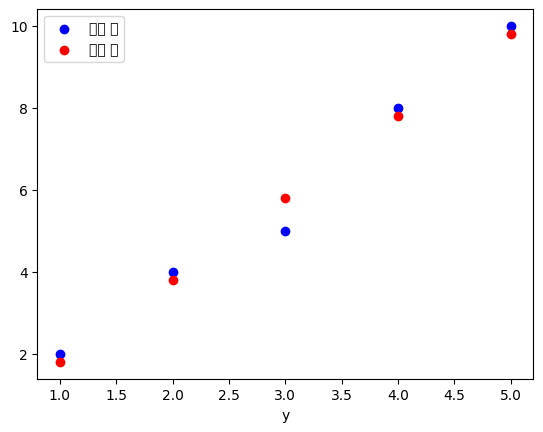

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 생성
X = np.array([[1],[2],[3],[4],[5]]) # 입력값 (2차원 형태)
y = np.array([2,4,5,8,10])
print(x.shape)
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X,y)

# 예측 값 계산
y_pred = model.predict(x)

# 평가 지표 계산
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(f"기울기 (coefficient) : {model.coef_[0]}") # 학습된 기울기 w 출력
print(f"절편 (intercept) : {model.intercept_}") # 학습된 절편 b 출력
print(f"MSE : {mse}")
print(f"R2 : {r2}")

plt.scatter(X,y, color='blue', label="실제 값")
plt.scatter(X,y_pred, color='red', label="예측 값")
plt.xlabel("X")
plt.xlabel("y")
plt.legend()
plt.show()


In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 생성
X = np.array([[1, 2100], [2, 2500], [3, 1800], [4, 2200], [5, 1700]])
y = np.array([500, 550, 480, 530, 475])

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측 값 계산
y_pred = model.predict(X)

# 평가 지표 계산
mse = mean_squared_error(y, y_pred)
print(f'회귀 계수(coefficient): {model.coef_}')
print(f'절편(intercept): {model.intercept_}')
print(f'MSE: {mse}')

회귀 계수(coefficient): [5.36082474 0.11237113]
절편(intercept): 259.4329896907218
MSE: 3.0927835051547214


c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\machine_learning\machine_learning_venv\Lib\site

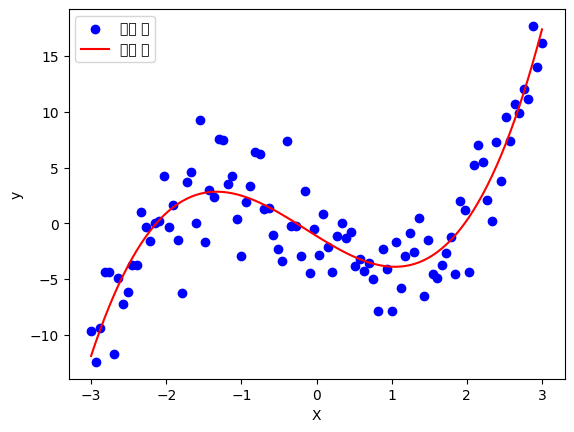

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 4*X + np.random.randn(100, 1) * 3

# 다항 특성 변환 (차수 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 예측 값 계산
y_pred = model.predict(X_poly)

# 결과 시각화
plt.scatter(X, y, color='blue', label='실제 값')
plt.plot(X, y_pred, color='red', label='예측 값')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

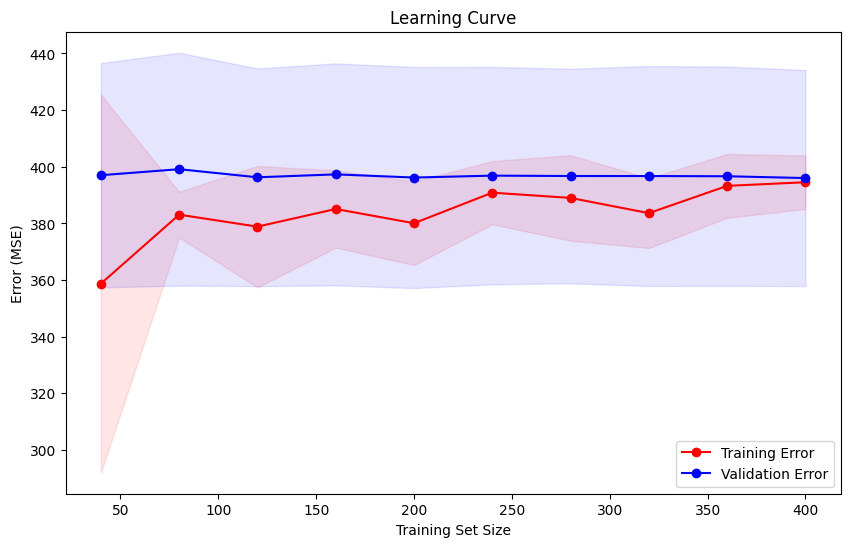

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# 데이터 생성
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# 평균과 표준편차 계산
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = -val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Error", color="red")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Error", color="blue")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="red")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="blue")

plt.xlabel("Training Set Size")
plt.ylabel("Error (MSE)")
plt.title("Learning Curve")
plt.legend()
plt.show()